# Plot curtain

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from typing import Optional
from pathlib import Path
from cartopy.mpl.geoaxes import GeoAxes

In [2]:
from plot_utils import create_fig_2d, add_rectangle

In [3]:

# %% ------------- INPUT PARAMETERS ------------- ###
# Earthcare file to get lat-lon track from
ec_year = "2024" # format 'YYYY'
ec_month = "08" # format 'MM'
ec_day = "01" # format 'DD'
ec_start_time = "T0019"  # format T'hhmm'
ec_end_time = "T0031"  # format T'hhmm'

ec_start_date = ec_year + ec_month + ec_day + ec_start_time
ec_end_date = ec_year + ec_month + ec_day + ec_end_time
ec_data_path = Path("/work") / "mh0731" / "m301196" / "ecomip"/ "ftp.eorc.jaxa.jp" / "eorc" / "CPR" / "1B" / "xCa" / ec_year / ec_month / ec_day
ec_file = ec_data_path / f"ECA_J_CPR_NOM_1BS_{ec_start_date}_{ec_end_date}_00997A_vCa_corr_xCa.nc"

# (optional) limits to lat-lon range of earthcare path
ec_lon_min = None # degrees
ec_lon_max = None # degrees
ec_lat_min = None # degrees
ec_lat_max = None # degrees

# model, zoom level, and time for curtain dataset
current_location = "EU"
model = "icon_d3hp003"
model = "icon_art_lam"
zoom = 10
model_year = "2020" # format 'YYYY'
model_month = ec_month # format 'MM'
model_day = ec_day # format 'DD'
model_time = ec_start_time  # format T'hhmm'

# curtain_file = curtain_dir / f"ec_curtain_{curtain_label}.zarr"
curtain_dir = Path("/work") / "mh0492" / "m301067" / "hackaton25" / "curtains" / model_year / model_month / model_day
curtain_dir = Path("/work/bb1215/global-hackathon-2025/Andreas") / "curtains"
curtain_label = f"{ec_start_date}_{ec_end_date}_{model}_zoom{zoom}_aero"
curtain_file = curtain_dir / f"ec_curtain_{curtain_label}.zarr"
day = 14  # 26 - 30
month = 8
curtain_file = curtain_dir / f"ec_curtains_2024{month:02d}{day:02d}_icon_art_lam_zoom{zoom}.zarr"

In [4]:
ds = xr.open_dataset(curtain_file)
# ds = ds.isel(track=slice(5000,None))
ds['dust_total_mc'].min().values

array(0., dtype=float32)

In [5]:
ds.track_lon.values

array([-18.09459087, -18.0964396 , -18.09828875, ..., -27.02834917,
       -27.03020815, -27.03206649], shape=(4994,))

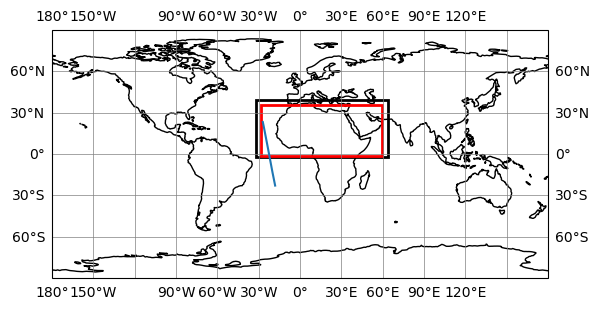

In [6]:
extent = [
    ds.track_lon.min().values,
    ds.track_lon.max().values,
    ds.track_lat.min().values,
    ds.track_lat.max().values
]
# extent = [-32.3, 63.7, -1.5, 39.4]
# fig, ax = create_fig_2d(figsize=None, extent=extent)
fig, ax = create_fig_2d(figsize=None)
ax.set_global()
add_rectangle(lon=[-32.3, 63.7], lat=[-2.3, 39.4], ax=ax)
add_rectangle(lon=[-28.2, 59.2], lat=[-1.5, 35.4], ax=ax, color='r')
plt.plot(ds.track_lon.values, ds.track_lat.values)

array(6.969211e-08, dtype=float32)

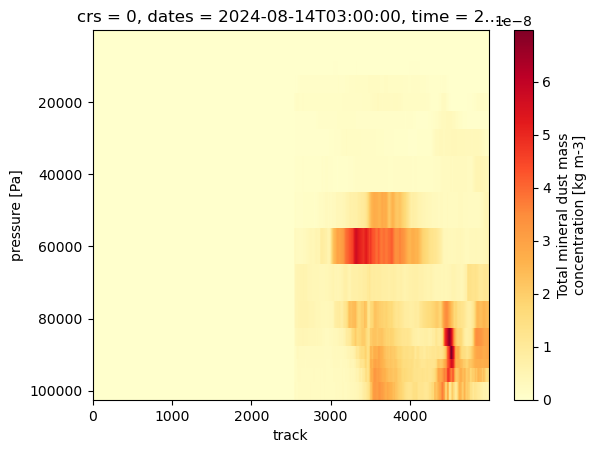

In [7]:
var = 'dre_lw_toa_allaero'
var = 'dust_total_mc'

ds[var].plot(yincrease=False, cmap='YlOrRd', vmin=0)
ds[var].max().values